In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import numpy as np

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

from datetime import datetime
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from tensorflow.keras.models import Model
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, Normalizer
import os 
import warnings
import gc
from plotly.subplots import make_subplots
import plotly.express as px 
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_recall_fscore_support, classification_report
import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from keras.layers import  MaxPool1D, Conv1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [2]:
#To show evaluation metrices: classification report, F/P, F/N
def report_heatmap(y_pred,y_test):
    
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(y_test, y_pred))
    figsize=(8,5)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

# Using 10 Best Features

In [3]:
bot_df= pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_Best.csv',delimiter=';')
bot_df.shape

(3668522, 20)

In [4]:
bot_df.head()

,Unnamed: 0,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [5]:
del bot_df['Unnamed: 0']  
bot_df.head() 

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [6]:
bot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 531.8+ MB


In [7]:
bot_df.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06
mean,1.834262e+06,1.213204e+05,8.871499e-01,8.253848e+01,1.017540e+00,3.134390e+00,2.231063e+00,9.245168e+01,4.455046e-01,2.955111e+00,3.020015e+00,9.998700e-01
std,1.059011e+06,7.579428e+04,8.037139e-01,2.439739e+01,1.483688e+00,1.186971e+00,1.517728e+00,1.817643e+01,6.028863e+01,7.245425e+02,1.860877e+00,1.140212e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171312e+05,5.487600e+04,3.001900e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819670e-01,1.000000e+02,0.000000e+00,1.559700e-01,2.806072e-01,1.000000e+00
50%,1.834262e+06,1.177690e+05,7.938960e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.690125e+00,1.000000e+02,0.000000e+00,2.837830e-01,4.009111e+00,1.000000e+00
75%,2.751392e+06,1.849300e+05,1.745296e+00,1.000000e+02,2.151138e+00,4.000000e+00,3.565203e+00,1.000000e+02,0.000000e+00,4.882010e-01,4.293582e+00,1.000000e+00
max,3.668522e+06,2.622120e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


In [8]:
bot_df['category'].value_counts()

DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: category, dtype: int64

In [9]:
attack_vs_protocol = pd.crosstab(bot_df.category, bot_df.proto)
attack_vs_protocol

proto,arp,icmp,ipv6-icmp,tcp,udp
category,,,,,
DDoS,35,16,0,978350,948223
DoS,49,14,0,617260,1032937
Normal,47,0,8,47,375
Reconnaissance,78,9022,0,67080,14902
Theft,4,0,0,75,0


In [10]:
#getting the 10-best features
bot_df.drop(['pkSeqID', 'proto','saddr','sport','daddr','dport','category','subcategory'], axis=1, inplace=True)  

bot_df.head()

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
0,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1
1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1
2,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1
3,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1
4,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1


In [11]:
bot_df.shape

(3668522, 11)

In [12]:
bot_df.isnull().sum()

seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
dtype: int64

There are no missing values

In [13]:
bot_df['attack'].value_counts()

1    3668045
0        477
Name: attack, dtype: int64

<AxesSubplot:xlabel='attack', ylabel='count'>

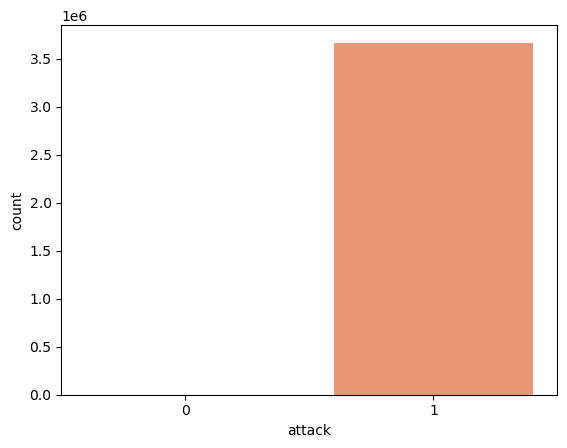

In [13]:
sns.countplot(x='attack', data=bot_df, palette='Set2')

The dataset is largely imbalanced. Hence, we balanced the whole dataset.

In [14]:
# Create our Dataset with the independent variables and the dependent variable.

X = bot_df.drop(['attack'],axis=1)
Y = bot_df['attack']

# Over-sampling of Test data
balance =  SMOTE(random_state=42)

#fitting
X, Y = balance.fit_resample(X,Y)

# Create a classic train-test split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=101)

print("Train Shape: ",X_train.shape)
print("Test Shape: ",X_test.shape)

Train Shape:  (6969285, 10)
Test Shape:  (366805, 10)


In [15]:
Y_test.value_counts()

1    183765
0    183040
Name: attack, dtype: int64

In [16]:
# Scaling
scaler = MinMaxScaler()
sX_train = scaler.fit_transform(X_train)
sX_test = scaler.transform(X_test)
Y_train.value_counts()

0    3485005
1    3484280
Name: attack, dtype: int64

Logistic Regression

Overall Accuracy: 99.73%
--------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    183040
           1       1.00      0.99      1.00    183765

    accuracy                           1.00    366805
   macro avg       1.00      1.00      1.00    366805
weighted avg       1.00      1.00      1.00    366805



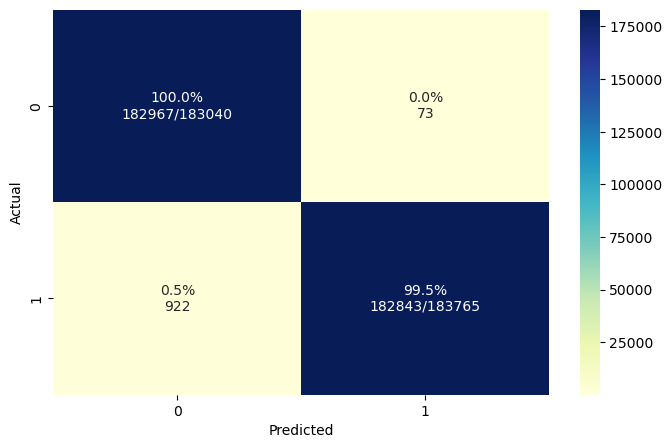

In [23]:
# defining the model 
modelLG = LogisticRegression(penalty='l1', C=0.1, solver='saga', max_iter=100)

#Fitting
 
modelLG.fit(sX_train,Y_train)

# making predictions for the testing dataset

y_pred = modelLG.predict(sX_test)

report_heatmap(y_pred,Y_test)

Gaussian Naive Bayes

Overall Accuracy: 98.95%
--------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    183040
           1       0.98      0.99      0.99    183765

    accuracy                           0.99    366805
   macro avg       0.99      0.99      0.99    366805
weighted avg       0.99      0.99      0.99    366805



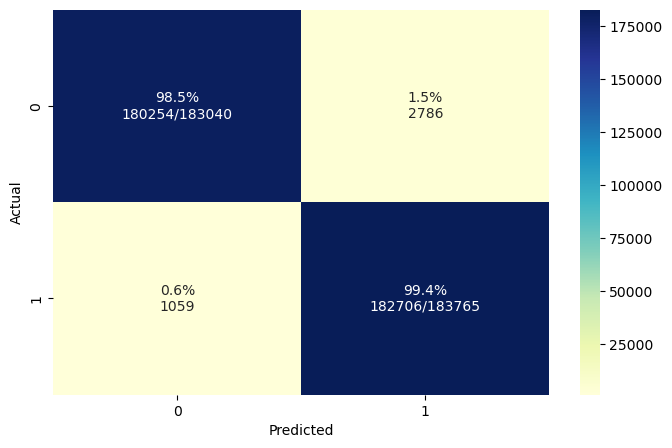

In [22]:
nb = GaussianNB()
nb.fit(sX_train,Y_train)

# Prediction
y_pred=nb.predict(sX_test)

# display report
report_heatmap(y_pred,Y_test)

PCA-> Logistic Regression

Overall Accuracy: 99.14%
--------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    183040
           1       1.00      0.98      0.99    183765

    accuracy                           0.99    366805
   macro avg       0.99      0.99      0.99    366805
weighted avg       0.99      0.99      0.99    366805



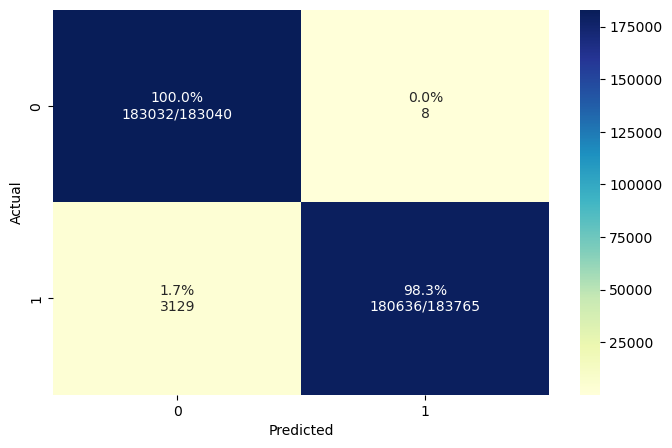

In [21]:
pca = PCA(n_components=3)  
X_train_pca = pca.fit_transform(sX_train)  
X_test_pca = pca.transform(sX_test)  

# Apply Logistic Regression  
LG=LogisticRegression(penalty='l1', C=0.1, solver='saga', max_iter=100)
LG.fit(X_train_pca, Y_train)  

# Predictions  
y_pred=LG.predict(X_test_pca)

# display report
report_heatmap(y_pred,Y_test) 

In [17]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(sX_train.shape[1],)))

model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()
model.fit(sX_train,Y_train,batch_size=100,epochs=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
Train on 6969285 samples
Epoch 1/2
6969285/6969285 [==============================] - 40s 6us/sample - loss: 0.0134 - accuracy: 0.9984
Epoch 2/2
6969285/6969285 [==============================] - 41s 6us/sample - loss: 0.0031 - accuracy: 0.9995


Overall Accuracy: 99.97%
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183040
           1       1.00      1.00      1.00    183765

    accuracy                           1.00    366805
   macro avg       1.00      1.00      1.00    366805
weighted avg       1.00      1.00      1.00    366805



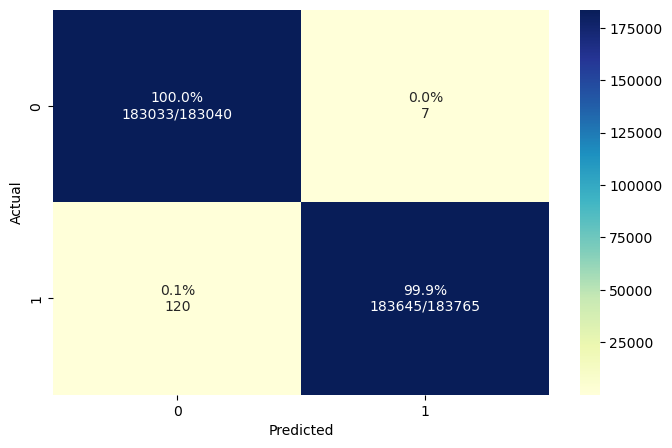

In [19]:
# Predictions  
y_pred=(model.predict(sX_test)> 0.5)

# display report
report_heatmap(y_pred,Y_test) 

Overall Accuracy: 99.96%
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183040
           1       1.00      1.00      1.00    183765

    accuracy                           1.00    366805
   macro avg       1.00      1.00      1.00    366805
weighted avg       1.00      1.00      1.00    366805



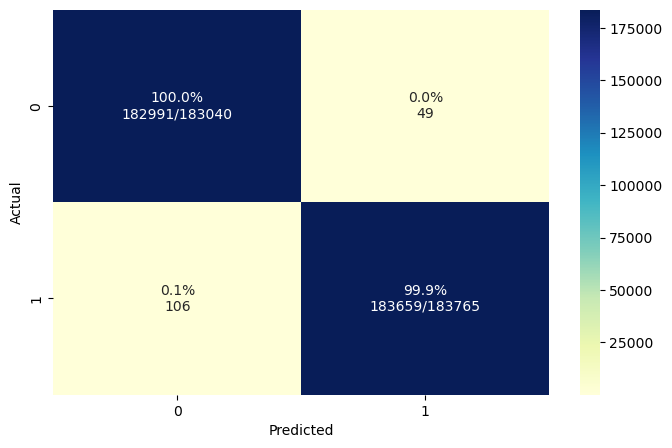

In [23]:
# Predictions  
y_pred=(model.predict(sX_test)> 0.2)

# display report
report_heatmap(y_pred,Y_test) 

PCA --> DNN

In [29]:
pca = PCA(n_components=5)  
X_train_pca = pca.fit_transform(sX_train)  
X_test_pca = pca.transform(sX_test)

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_pca.shape[1],)))

model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()
model.fit(X_train_pca,Y_train,batch_size=100,epochs=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                60        
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Train on 6969285 samples
6969285/6969285 [==============================] - 41s 6us/sample - loss: 0.0119 - accuracy: 0.9989


Overall Accuracy: 99.95%
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183040
           1       1.00      1.00      1.00    183765

    accuracy                           1.00    366805
   macro avg       1.00      1.00      1.00    366805
weighted avg       1.00      1.00      1.00    366805



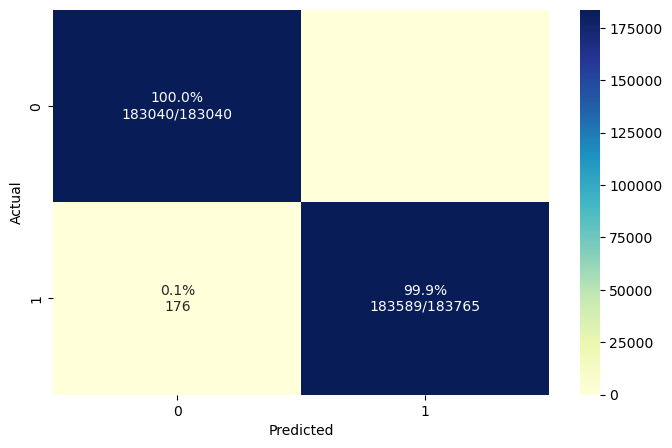

In [30]:
# Predictions  
y_pred=(model.predict(X_test_pca)> 0.5)

# display report
report_heatmap(y_pred,Y_test) 

In [ ]:
#end